In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
from glob import glob
from tqdm import tqdm
%matplotlib inline
from PIL import Image

In [3]:
train_path="data/DATASET/TRAIN"
test_path="data/DATASET/TEST"

In [4]:
x_data = [] 
y_data = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:25<00:00, 392.01it/s]


In [5]:
x_data = [] 
y_data = [] 

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        
data_test=pd.DataFrame({'image': x_data,'label': y_data})

100%|█████████████████████████████████████████████████████████████████████████████| 1112/1112 [00:02<00:00, 379.01it/s]


## Exploratry Data Analysis

In [6]:
print("Dataset loaded successfully!")
print(f"Number of train images: {len(data)}")
print(f"Number of test images: {len(data_test)}")

Dataset loaded successfully!
Number of train images: 22564
Number of test images: 2513


In [7]:
# List categories
categories = os.listdir((train_path))
print("Categories: ",categories)

# Count images in each category for train and test sets
def count_images_per_category(dataset_path):
    category_counts = {}
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            category_counts[category] = len(os.listdir(category_path))
    return category_counts

train_counts = count_images_per_category(train_path)
test_counts = count_images_per_category(test_path)

print("Train Counts:", train_counts)
print("Test Counts:", test_counts)

Categories:  ['O', 'R']
Train Counts: {'O': 12565, 'R': 9999}
Test Counts: {'O': 1401, 'R': 1112}


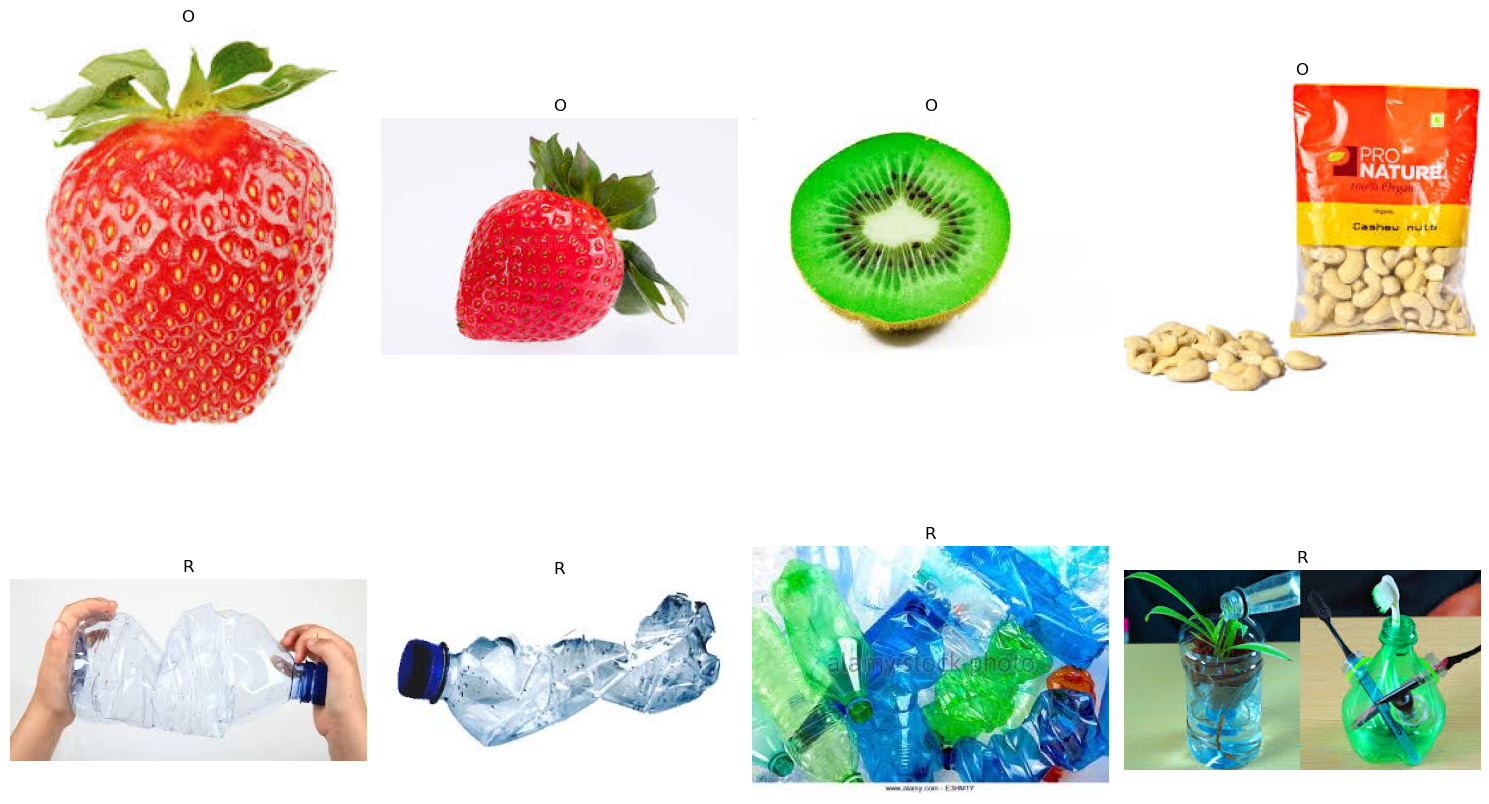

In [8]:
def display_sample_images(dataset_path, categories, num_samples=4):
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        image_files = os.listdir(category_path)[:num_samples]
        for j, image_file in enumerate(image_files):
            img_path = os.path.join(category_path, image_file)
            img = Image.open(img_path)
            plt.subplot(len(categories), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(train_path, categories)

C:\Users\shubh\AppData\Local\Temp\ipykernel_17644\1881694589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")


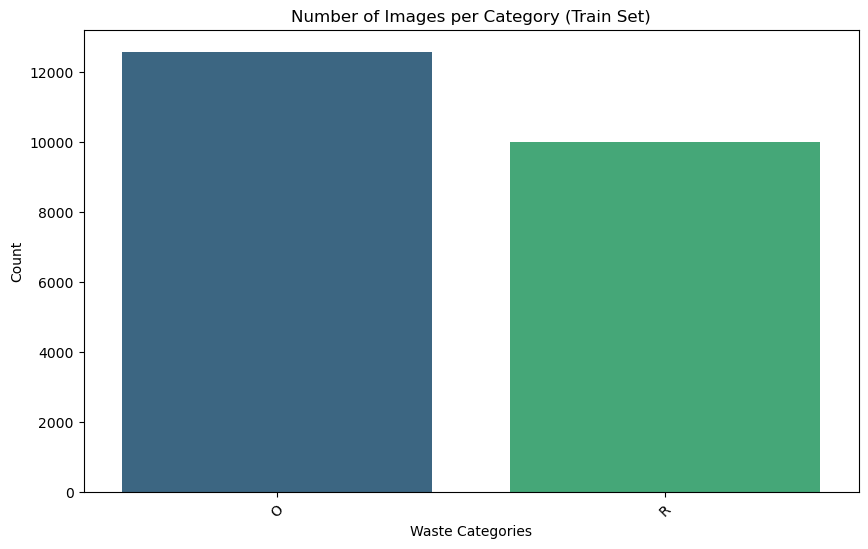

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(train_counts.keys()), y=list(train_counts.values()), palette="viridis")
plt.title("Number of Images per Category (Train Set)")
plt.xlabel("Waste Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

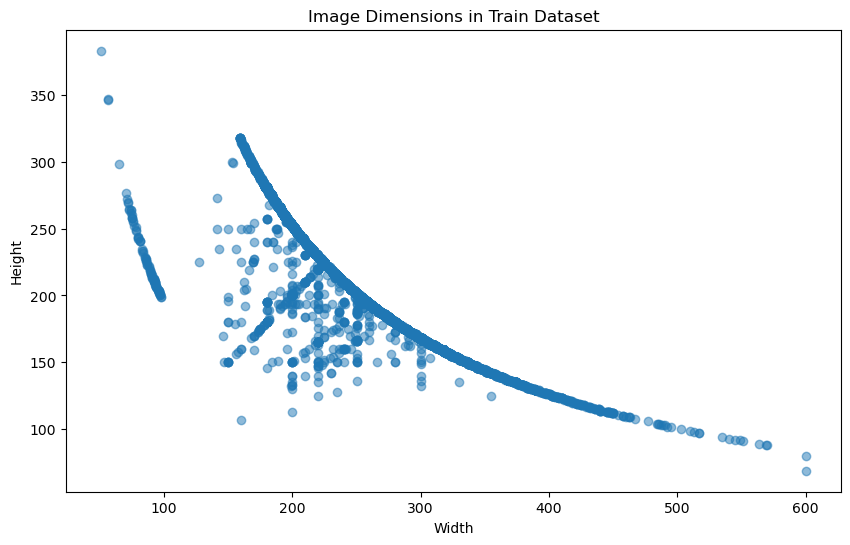

Average Width: 252.32, Average Height: 203.75


In [10]:
def analyze_image_dimensions(dataset_path):
    dimensions = []
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        for image_file in os.listdir(category_path):
            img_path = os.path.join(category_path, image_file)
            img = Image.open(img_path)
            dimensions.append(img.size)
    return dimensions

train_dimensions = analyze_image_dimensions(train_path)

# Plot image dimensions
widths, heights = zip(*train_dimensions)
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title("Image Dimensions in Train Dataset")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

# Summary statistics
print(f"Average Width: {np.mean(widths):.2f}, Average Height: {np.mean(heights):.2f}")

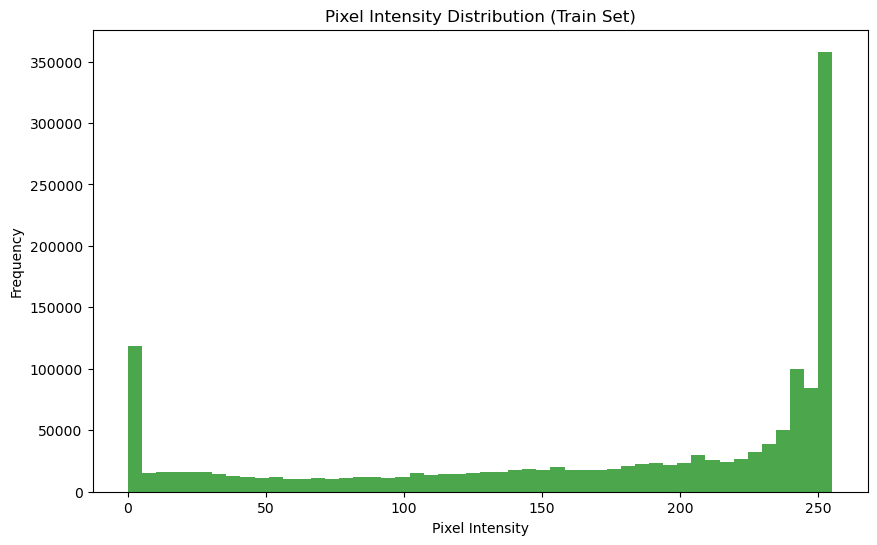

In [11]:
def analyze_pixel_intensity(dataset_path, categories, num_samples=5):
    pixel_values = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        image_files = os.listdir(category_path)[:num_samples]
        for image_file in image_files:
            img_path = os.path.join(category_path, image_file)
            img = np.array(Image.open(img_path))
            pixel_values.extend(img.flatten())
    return pixel_values

train_pixel_values = analyze_pixel_intensity(train_path, categories)

# Plot histogram of pixel values
plt.figure(figsize=(10, 6))
plt.hist(train_pixel_values, bins=50, color='green', alpha=0.7)
plt.title("Pixel Intensity Distribution (Train Set)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

## In first week Data collection , understanding and Exploratry Data analysis of data is done 

## Data Augmentation and Prepartaion

In [12]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\shubh\anaconda3\envs\tf-gpu\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [28]:
train_datagen=ImageDataGenerator(
                   rescale=1./255,
                   horizontal_flip=0.3,
                   vertical_flip=0.3,
                   rotation_range=36,
                   shear_range=0.2,
                   width_shift_range=0.05,
                   height_shift_range=0.05,
                   fill_mode="nearest"
                  )

test_datagen=ImageDataGenerator(rescale=1./255)

In [30]:
train_dir="data/DATASET/TRAIN/"
test_dir="data/DATASET/TEST/"
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## Model Building

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import models, layers,Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
model = models.Sequential([
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(2, activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [70]:
es= EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('best_waste_classification_model.h5', save_best_only=True)

In [72]:
history = model.fit(
    train_generator,  
    validation_data=test_data,
    epochs=10,                   
    callbacks=[es, mc]          
)


Epoch 1/10
706/706 [==============================] - 505s 714ms/step - loss: 0.2549 - accuracy: 0.8996 - val_loss: 0.2589 - val_accuracy: 0.9049
Epoch 2/10
706/706 [==============================] - 512s 725ms/step - loss: 0.2513 - accuracy: 0.8997 - val_loss: 0.2822 - val_accuracy: 0.8985
Epoch 3/10
706/706 [==============================] - 506s 716ms/step - loss: 0.2528 - accuracy: 0.8992 - val_loss: 0.2518 - val_accuracy: 0.9117
Epoch 4/10
706/706 [==============================] - 500s 708ms/step - loss: 0.2457 - accuracy: 0.9020 - val_loss: 0.2665 - val_accuracy: 0.9041
Epoch 5/10
706/706 [==============================] - 469s 665ms/step - loss: 0.2425 - accuracy: 0.9021 - val_loss: 0.2676 - val_accuracy: 0.9001
Epoch 6/10
706/706 [==============================] - 490s 693ms/step - loss: 0.2400 - accuracy: 0.9069 - val_loss: 0.2347 - val_accuracy: 0.9184
Epoch 7/10
706/706 [==============================] - 462s 655ms/step - loss: 0.2378 - accuracy: 0.9056 - val_loss: 0.2679 -

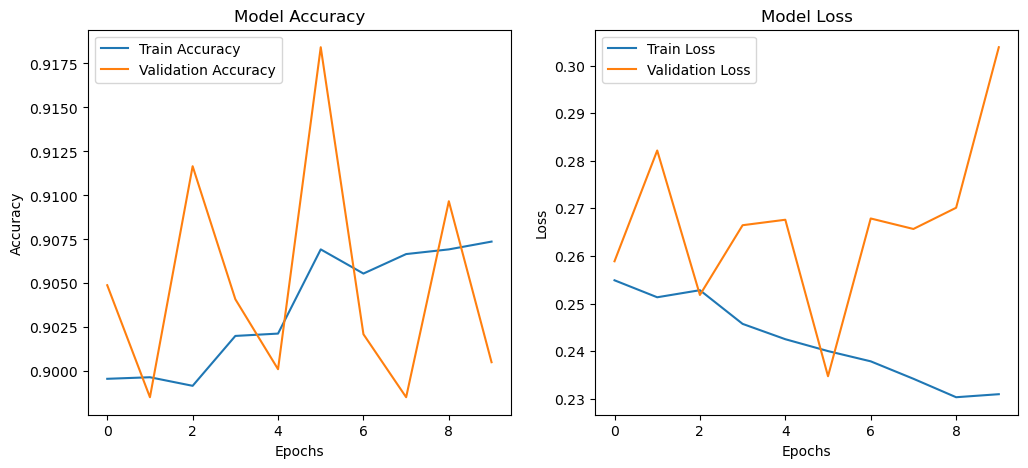

In [80]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [73]:
if not os.path.isdir('model/'):
    os.mkdir('model/')
model.save("model/custom_model.h5")
print("Model saved succesfully")

Model saved succesfully


In [74]:
model2 = models.Sequential([
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(2, activation='softmax'),
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

In [75]:
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

In [78]:
history2 = model2.fit(
    train_generator,  
    validation_data=test_data,
    epochs=10,                   
    callbacks=[es, mc]          
)

Epoch 1/10
706/706 [==============================] - 228s 323ms/step - loss: 0.2885 - accuracy: 0.8851 - val_loss: 0.3131 - val_accuracy: 0.8842
Epoch 2/10
706/706 [==============================] - 223s 315ms/step - loss: 0.2857 - accuracy: 0.8865 - val_loss: 0.2661 - val_accuracy: 0.8977
Epoch 3/10
706/706 [==============================] - 211s 299ms/step - loss: 0.2776 - accuracy: 0.8894 - val_loss: 0.2832 - val_accuracy: 0.8914
Epoch 4/10
706/706 [==============================] - 213s 302ms/step - loss: 0.2734 - accuracy: 0.8902 - val_loss: 0.2935 - val_accuracy: 0.8886
Epoch 5/10
706/706 [==============================] - 213s 301ms/step - loss: 0.2665 - accuracy: 0.8937 - val_loss: 0.2664 - val_accuracy: 0.9009
Epoch 6/10
706/706 [==============================] - 216s 305ms/step - loss: 0.2651 - accuracy: 0.8943 - val_loss: 0.3301 - val_accuracy: 0.8874
Epoch 7/10
706/706 [==============================] - 219s 310ms/step - loss: 0.2611 - accuracy: 0.8958 - val_loss: 0.3245 -

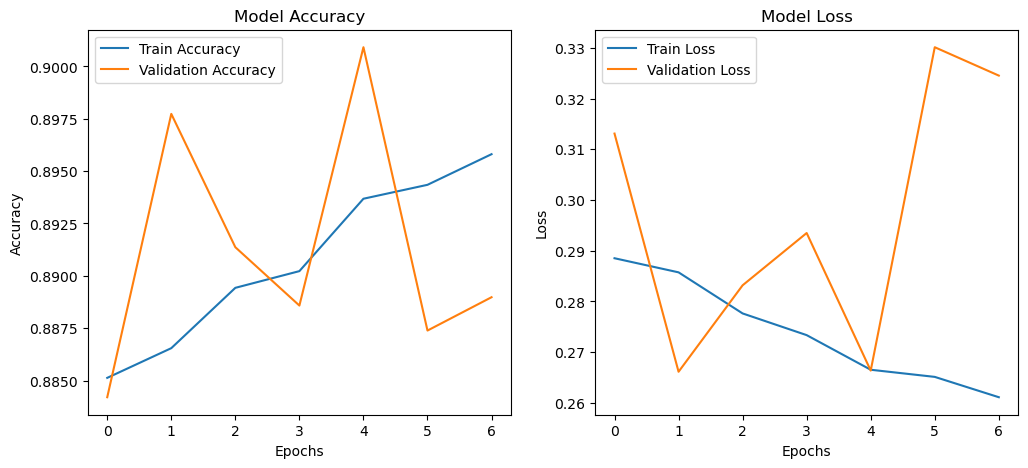

In [79]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [65]:
import gc
import tensorflow as tf

gc.collect()
tf.keras.backend.clear_session()

## In Second week 2 custom models are trained with fluctuting values and 90% accuracy of both train and validation so i will fine tune in next week with some pretrained models